# Homework Week 1
## Tên: Lâm Nhật Quân
## MSSV: 21110461



#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)

In [79]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [80]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [81]:
PATH = "/content/drive/MyDrive/Week 01/final_house_loan.csv" # Path to your file

df = read_dataset(PATH)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


## Data Analysis

In [82]:
# Data analysis
# Todo: analyze your data here

<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

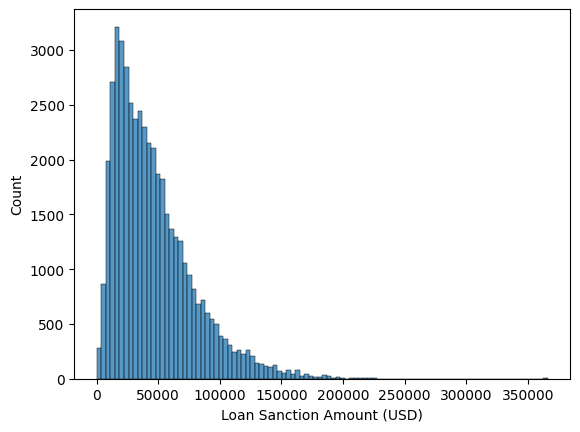

In [83]:
import seaborn as sns
sns.histplot(x='Loan Sanction Amount (USD)', data = df, bins = 100)

## Preprocessing

In [84]:
#null check if there is any missing data
print(df.isnull().sum())
print("Sample size:", len(df))

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64
Sample size: 47297


In [85]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    df = df.dropna(how='any', axis = 0)
    return df

In [86]:
df = preprocessing_data(df.copy())

In [87]:
print("Not null sample size:", len(df))

Not null sample size: 47251


## Feature Engineering

In [88]:
# from scipy.stats import zscore
# import pandas as pd

# # Create a sample df
# df = pd.DataFrame({'num_1': [1,2,3,4,5,6,7,8,9,3,4,6,5,7,3,2,9]})

# # Calculate the zscores and drop zscores into new column
# df['num_1_zscore'] = zscore(df['num_1'])

# display(df)

In [89]:
from scipy.stats import zscore

def normalize_data(df):
  normalized_data = df.copy()
  normalized_data["Gender"] = normalized_data["Gender"].astype("category").cat.codes
  normalized_data["Income Stability"] = normalized_data["Income Stability"].astype("category").cat.codes
  normalized_data["Property Location"] = normalized_data["Property Location"].astype("category").cat.codes
  normalized_data["Age"] = zscore(normalized_data["Age"])
  normalized_data["Income (USD)"] = zscore(normalized_data["Income (USD)"])
  normalized_data["Property Age"] = zscore(normalized_data["Property Age"])
  normalized_data["Property Price"] = zscore(normalized_data["Property Price"])
  return normalized_data

<Axes: >

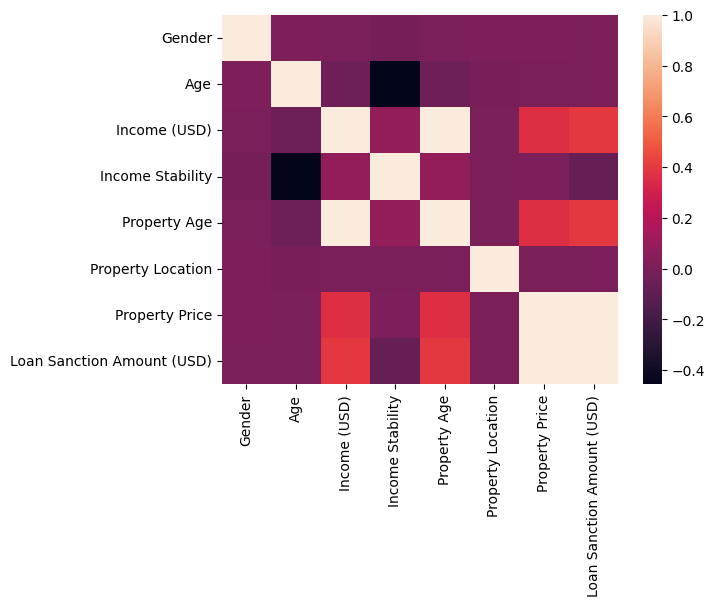

In [90]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [91]:
display(df.head())
display(df.corr())

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,-1.305774,-0.606838,1,-0.600375,0,-0.797694,21026.420753
1,1,-0.684130,-0.383131,1,-0.382454,2,0.473190,60595.183366
2,0,-0.186815,-0.472881,1,-0.468349,0,-0.188179,39181.648002
3,1,1.553786,0.095452,0,0.103172,0,2.318560,128497.710865
4,0,1.367293,1.383666,0,1.382990,2,-0.560805,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


# Apply machine learning model

## Train-test split

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [93]:
cols = df.columns.tolist()
cols.remove('Loan Sanction Amount (USD)')

feature = df[cols]
target = df['Loan Sanction Amount (USD)']

In [94]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    X = df[cols] # Todo: Select features
    y = df['Loan Sanction Amount (USD)'] # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [95]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size = train_size, random_state=2023) # Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [96]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True) # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X, y)
    
    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
predTrain = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=predTrain, y_true=trainY) )
predTest = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=predTest, y_true=testY) )

print('Model coeficient = ',model.coef_)
print()
print('Model intercept = ', model.intercept_)
MAE_linear = [mean_absolute_error(y_pred=predTrain, y_true=trainY), mean_absolute_error(y_pred=predTest, y_true=testY)]

mean absolute error of linear model on train set  163.1411615311818
mean absolute error of linear model on test set  137.10457506709068
Model coeficient =  [  -234.48381499  -1277.03711358    856.99928216 -11143.13630804
    739.21924745    -60.29291367  31815.38204674]

Model intercept =  56809.7843152843


In [98]:
from sklearn import linear_model


def build_lasso_model(X, y):
    model = linear_model.Lasso(alpha=0.5) # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model

lasso = build_lasso_model(trainX, trainY)
# Compare on training dataset
predTrain = lasso.predict(trainX)   
print("mean absolute error of linear Lasso model on train set ", mean_absolute_error(y_pred=predTrain, y_true=trainY) )
predTest = lasso.predict(testX)   
print("mean absolute error of linear Lasso model on test set ", mean_absolute_error(y_pred=predTest, y_true=testY) )

print(lasso.coef_) # print coefficient
print()
print(lasso.intercept_) # print intercept_
MAE_lasso = [mean_absolute_error(y_pred=predTrain, y_true=trainY), mean_absolute_error(y_pred=predTest, y_true=testY)]

mean absolute error of linear Lasso model on train set  163.23520311022884
mean absolute error of linear Lasso model on test set  137.171247626252
[  -232.46009942  -1275.32101182   1346.22878596 -11133.88165804
    249.51495089    -59.55692891  31815.04606471]

56799.61562639706


In [99]:
#improve the lasso model by choosing the best alpha 
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

best_alpha ={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 15 ,20]}

def build_lasso_model(X, y):
    model = linear_model.Lasso(fit_intercept=True) # Todo: use sklearn model and config your parameters
    
    modelCV = GridSearchCV(model, best_alpha)
    modelCV.fit(X,y)
    print('Best alpha: ', modelCV.best_params_['alpha'])

    # Todo: fit your model with X, y
    model = linear_model.Lasso(alpha=modelCV.best_params_['alpha'], fit_intercept=True)
    model.fit(X,y)
    return model

lasso = build_lasso_model(trainX, trainY)
# Compare on training dataset
predTrain = lasso.predict(trainX)   
print("mean absolute error of linear Lasso model on train set ", mean_absolute_error(y_pred=predTrain, y_true=trainY) )
predTest = lasso.predict(testX)   
print("mean absolute error of linear Lasso model on test set ", mean_absolute_error(y_pred=predTest, y_true=testY) )

print(lasso.coef_) # print coefficient
print()
print(lasso.intercept_) # print intercept_
MAE_lasso = [mean_absolute_error(y_pred=predTrain, y_true=trainY), mean_absolute_error(y_pred=predTest, y_true=testY)]

Best alpha:  0.1
mean absolute error of linear Lasso model on train set  163.18936462296867
mean absolute error of linear Lasso model on test set  137.13409295565282
[  -234.10511973  -1276.68079316   1346.44751002 -11141.2137259
    249.69272453    -60.17202235  31815.31254133]

56807.7242222434


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 15, 20]
[163.18936462296867, 163.1966840456618, 163.20719384803886, 163.22017101876835, 163.23520311022884, 163.25028251578019, 163.27157977342668, 163.29584741219443, 163.32274276210055, 163.35281366290775, 163.79604777811286, 164.49271465883987, 165.49133954941047, 166.76264123047022, 168.24177314943074, 169.92023622453152, 189.38071989603046, 205.0055110335674]


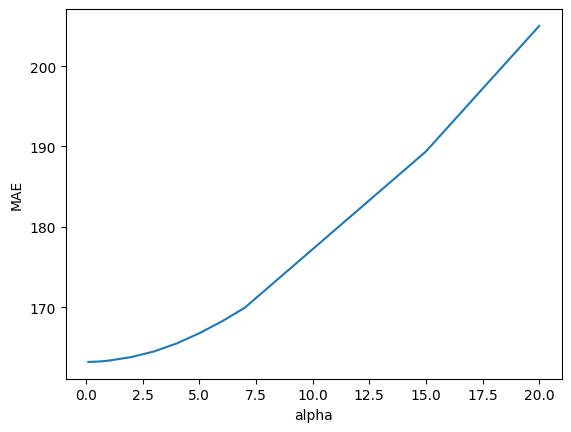

In [100]:
#plot the ratio to find the best ratio for the Ridge model
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt


alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 15 ,20]

MAE = []

for al in alpha:
  lasso = linear_model.Lasso(alpha=al, fit_intercept=True)
  lasso.fit(trainX, trainY)
  predTrain = lasso.predict(trainX)
  err = mean_absolute_error(y_pred=predTrain, y_true=trainY)
  MAE.append(err)

print(alpha)
print(MAE)
plt.plot(alpha, MAE)
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.show()

In [101]:
def build_ridge_model(X, y):
    model = linear_model.Ridge(alpha=.5) # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model

ridge = build_ridge_model(trainX, trainY)
# Compare on training dataset
predTrain = ridge.predict(trainX)   
print("mean absolute error of linear Ridge model on train set ", mean_absolute_error(y_pred=predTrain, y_true=trainY) )
predTest = ridge.predict(testX)   
print("mean absolute error of linear Ridge model on test set ", mean_absolute_error(y_pred=predTest, y_true=testY) )

print(ridge.coef_) # print coefficient
print()
print(ridge.intercept_) # print intercept_
MAE_ridge = [mean_absolute_error(y_pred=predTrain, y_true=trainY), mean_absolute_error(y_pred=predTest, y_true=testY)]

mean absolute error of linear Ridge model on train set  162.98807481297877
mean absolute error of linear Ridge model on test set  136.93860975256973
[  -234.44070408  -1276.67319467    826.80984521 -11140.48547751
    769.54532686    -60.28655803  31814.84531301]

56807.337620620354


In [102]:
#improve the Ridge model by choosing the best alpha 
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

best_alpha ={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 15 ,20]}

def build_ridge_model(X, y):
    model = linear_model.Ridge(fit_intercept=True) # Todo: use sklearn model and config your parameters
    
    #Create the gridCV
    modelCV = GridSearchCV(model, best_alpha)
    modelCV.fit(X,y)
    print('Best alpha: ', modelCV.best_params_['alpha'])

    # Todo: fit your model with X, y
    model = linear_model.Ridge(alpha=modelCV.best_params_['alpha'], fit_intercept=True)
    model.fit(X,y)
    return model

ridge = build_ridge_model(trainX, trainY)
# Compare on training dataset
predTrain = ridge.predict(trainX)   
print("mean absolute error of linear Lasso model on train set ", mean_absolute_error(y_pred=predTrain, y_true=trainY) )
predTest = ridge.predict(testX)   
print("mean absolute error of linear Lasso model on test set ", mean_absolute_error(y_pred=predTest, y_true=testY) )

print(ridge.coef_) # print coefficient
print()
print(ridge.intercept_) # print intercept_
MAE_ridge = [mean_absolute_error(y_pred=predTrain, y_true=trainY), mean_absolute_error(y_pred=predTest, y_true=testY)]

Best alpha:  0.1
mean absolute error of linear Lasso model on train set  163.11028738188656
mean absolute error of linear Lasso model on test set  137.0713486779626
[  -234.47490211  -1276.96444657    846.61551868 -11142.60679446
    749.63021567    -60.29134993  31815.2747019 ]

56809.29513721769


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 15, 20, 30, 40, 50]
[163.11028738188656, 163.07959206638535, 163.04900729740007, 163.01850330703044, 162.98807481297877, 162.9578103079628, 162.9277318780895, 162.89776131178314, 162.86787311089552, 162.83806307647413, 162.54872434000345, 162.27643114187939, 162.0215036656829, 161.78414831426687, 161.56203019366907, 161.35550318993788, 160.3727578063955, 160.58755644560966, 163.0329323841788, 168.347643750739, 176.46303084511874]


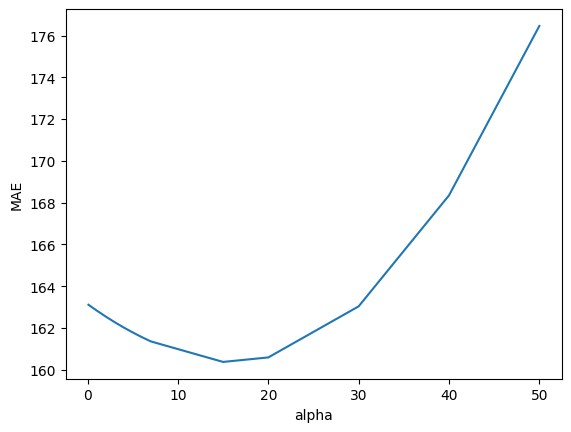

In [103]:
#plot the ratio to find the best ratio for the Ridge model
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt


alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 15 ,20, 30, 40, 50]

MAE = []

for al in alpha:
  ridge = linear_model.Ridge(alpha=al, fit_intercept=True)
  ridge.fit(trainX, trainY)
  predTrain = ridge.predict(trainX)
  err = mean_absolute_error(y_pred=predTrain, y_true=trainY)
  MAE.append(err)

print(alpha)
print(MAE)
plt.plot(alpha, MAE)
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.show()

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model =  ElasticNet(alpha = 1, l1_ratio = 1, fit_intercept=True) # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model

elastic = build_elastic_model(trainX, trainY)
# Compare on training dataset
predTrain = elastic.predict(trainX)   
print("mean absolute error of linear Elastic Net model on train set ", mean_absolute_error(y_pred=predTrain, y_true=trainY))
predTest = elastic.predict(testX)   
print("mean absolute error of linear Elastic Net model on test set ", mean_absolute_error(y_pred=predTest, y_true=testY))

print(elastic.coef_) # print coefficient
print()
print(elastic.intercept_) # print intercept_
MAE_elastic = [mean_absolute_error(y_pred=predTrain, y_true=trainY), mean_absolute_error(y_pred=predTest, y_true=testY)]

mean absolute error of linear Elastic Net model on train set  163.35281366290775
mean absolute error of linear Elastic Net model on test set  137.2766566312626
[  -230.40248941  -1273.46773095   1346.00192013 -11124.47507009
    249.29072043    -58.78671327  31814.69711507]

56789.257882130885


In [105]:
#improve the ElasticNet model by choosing the best alpha 
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

best_ratio ={'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

def ElasticModel_CV(X, y):
    model = ElasticNet(fit_intercept=True) # Todo: use sklearn model and config your parameters
    
    #Create the gridCV
    modelCV = GridSearchCV(model, best_ratio)
    modelCV.fit(X,y)
    print('Best ratio: ', modelCV.best_params_['l1_ratio'])

    # Todo: fit your model with X, y
    model = ElasticNet(alpha = 1,l1_ratio= modelCV.best_params_['l1_ratio'], fit_intercept=True)
    model.fit(X,y)
    return model

elastic = ElasticModel_CV(trainX, trainY)
# Compare on training dataset
predTrain = elastic.predict(trainX)   
print("mean absolute error of linear Lasso model on train set ", mean_absolute_error(y_pred=predTrain, y_true=trainY) )
predTest = elastic.predict(testX)   
print("mean absolute error of linear Lasso model on test set ", mean_absolute_error(y_pred=predTest, y_true=testY) )

print(elastic.coef_) # print coefficient
print()
print(elastic.intercept_) # print intercept_
MAE_elastic = [mean_absolute_error(y_pred=predTrain, y_true=trainY), mean_absolute_error(y_pred=predTest, y_true=testY)]

Best ratio:  1
mean absolute error of linear Lasso model on train set  163.35281366290775
mean absolute error of linear Lasso model on test set  137.2766566312626
[  -230.40248941  -1273.46773095   1346.00192013 -11124.47507009
    249.29072043    -58.78671327  31814.69711507]

56789.257882130885


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
[11621.250759961842, 10956.828407870147, 10214.398516092979, 9378.743190043839, 8429.374833649641, 7341.0583802368665, 6081.975412599602, 4598.760190461011, 2773.7595941111585, 163.35281366290775]


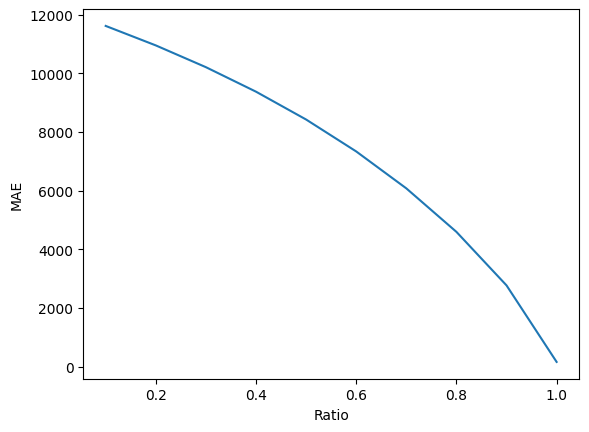

In [106]:
#plot the ratio to find the best ratio for the elastic net model
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt


ratio =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

MAE = []

for rat in ratio:
  elastic = ElasticNet(alpha = 1,l1_ratio= rat, fit_intercept=True)
  elastic.fit(trainX, trainY)
  predTrain = elastic.predict(trainX)
  err = mean_absolute_error(y_pred=predTrain, y_true=trainY)
  MAE.append(err)

print(ratio)
print(MAE)
plt.plot(ratio, MAE)
plt.xlabel('Ratio')
plt.ylabel('MAE')
plt.show()

## Compare the error of 3 algorithms to Linear Regression



In [107]:
#compare
print('mean absolute error of the train set and test set of Linear Regression model: ', MAE_linear)
print('mean absolute error of the train set and test set of Linear Lasso model: ',MAE_lasso)
print('mean absolute error of the train set and test set of Linear Ridge model: ',MAE_ridge)
print('mean absolute error of the train set and test set of Linear Elastic Net model: ',MAE_elastic)

mean absolute error of the train set and test set of Linear Regression model:  [163.1411615311818, 137.10457506709068]
mean absolute error of the train set and test set of Linear Lasso model:  [163.18936462296867, 137.13409295565282]
mean absolute error of the train set and test set of Linear Ridge model:  [163.11028738188656, 137.0713486779626]
mean absolute error of the train set and test set of Linear Elastic Net model:  [163.35281366290775, 137.2766566312626]


* Theo như số liệu, ta có thể thấy các giá trị MAE của các model có sự chênh lệch không quá lớn, và gần như là tương đương.

## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [108]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  159.7114757252646
mean absolute error of linear model (with poly transform) on test set  133.85232423136563


In [109]:
linear_model = poly_model["linearregression"]

In [110]:
pred = model.predict(trainX)
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY))
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY))

mean absolute error of linear model on train set  163.1411615311818
mean absolute error of linear model (with poly transform) on train set  159.7114757252646


In [111]:
from sklearn.manifold import TSNE

# Split X, y from dataset
columns = df.columns.tolist()     # Columns name
draw_data = df[columns]        # X 
draw_data = TSNE(n_components=1, learning_rate='auto', init='random', perplexity=3).fit_transform(draw_data)

In [112]:
from sklearn.model_selection import train_test_split
draw_train_X, draw_test_X ,trainY, testY = train_test_split(draw_data, target, train_size=0.70, random_state=2023)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(33075, 7)
Test:(14176, 7)


In [113]:
#model basic 
model = LinearRegression(fit_intercept=True)   
model.fit(draw_train_X, trainY)
pred = model.predict(draw_train_X)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )

#model polinomial 
poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
poly_model.fit(draw_train_X, trainY)
poly_pred = poly_model.predict(draw_train_X)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

mean absolute error of linear model on train set  24934.876875266942
mean absolute error of linear model (with poly transform) on train set  22502.74209838898


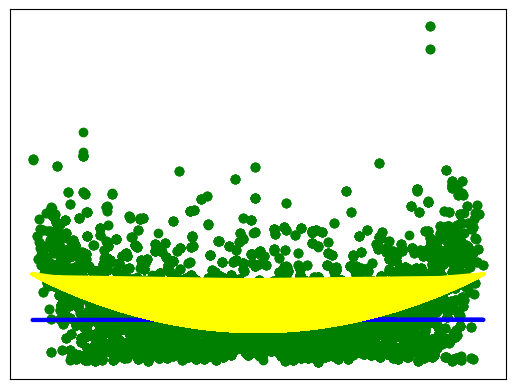

In [114]:
import matplotlib.pyplot as plt

# pred = model.predict(trainX)
# poly_pred = poly_model.predict(trainX)

plt.scatter(draw_train_X, trainY, color="g")
plt.plot(draw_train_X, pred, color="blue", linewidth=3)
plt.plot(draw_train_X, poly_pred, color="yellow", linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

### What will the result be if we choose the n order too high? If we choose the n order too high, we may make the model operate worse, since the MAE of the test set seems to increase more and more when the n order increases too high.